16. 아래 데이터셋을 기반으로 분류 회귀 모델을 완성 후 성능평가까지 구현하세요  - : iris.csv 데이터셋  
 - 조건  
 * : 3 2 분류 개 품종 중 개 선택하여 이진 분류 진행  
 * : 3 1 , 4 회귀 개 품종 중 개 선택 개 피쳐 중 꽃잎의 길이값 예측 회귀 


In [28]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score

In [29]:
# 데이터 확인
file = './data/iris.csv'
pd.read_csv(file)
irisDF = pd.read_csv(file)

In [30]:
# 데이터 전처리 (결측값 확인)
irisDF.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [31]:
# 데이터 전처리 (중복값 확인)
irisDF.duplicated().sum()

1

In [56]:
irisDF.value_counts()

sepal.length  sepal.width  petal.length  petal.width  variety   
5.8           2.7          5.1           1.9          Virginica     2
6.2           2.2          4.5           1.5          Versicolor    1
              2.9          4.3           1.3          Versicolor    1
              3.4          5.4           2.3          Virginica     1
6.3           2.3          4.4           1.3          Versicolor    1
                                                                   ..
5.4           3.9          1.3           0.4          Setosa        1
                           1.7           0.4          Setosa        1
5.5           2.3          4.0           1.3          Versicolor    1
              2.4          3.7           1.0          Versicolor    1
7.9           3.8          6.4           2.0          Virginica     1
Name: count, Length: 149, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2f066ff43d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2f066ff4910>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f066ff4130>,
 'medians': [<matplotlib.lines.Line2D at 0x2f066ff4dc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2f0670020a0>,
 'means': []}

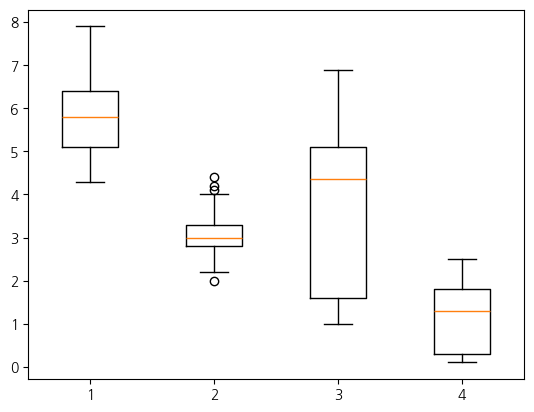

In [32]:
# 데이터 전처리 (이상치 확인)
plt.boxplot(irisDF[irisDF.columns[:-1]]) # 마지막 컬럼인 variety를 제외한 컬럼을 박스그래프로 시각화 후 확인.

In [55]:
# 사분위수로 이상치 제거 
q3 = irisDF[irisDF.columns[2]].quantile(0.75)
q1 = irisDF[irisDF.columns[2]].quantile(0.25)
iqr = q3-q1
bd = 1.5*iqr

# idx1 = irisDF[irisDF.columns[2]>q3+bd]
# idx2 = irisDF[irisDF.columns[2]<q1-bd]

In [57]:
twoDF = irisDF.iloc[:100]
twoDF = twoDF.replace({'Setosa':0, 'Versicolor':1})
#twoDF
targetDF = twoDF['variety']
featureDF = twoDF[twoDF.columns[:-1]]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size = 0.2, stratify=targetDF)

In [59]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
trainScoreList = []
testScoreList = []
for k in range(1, 50) :
    model.fit(X_train, y_train)
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)
    trainScoreList.append(train)
    testScoreList.append(test)

train_idx = trainScoreList.index(max(trainScoreList))
test_idx = testScoreList.index(max(testScoreList))


In [61]:
model = KNeighborsClassifier(n_neighbors=train_idx+1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [62]:
model = KNeighborsClassifier(n_neighbors=test_idx+1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [63]:
# 성능평가
model.predict(X_train)
model.predict_proba(X_train)
model.predict(X_test)
model.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])